In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from scipy.stats import linregress

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a87cccea06092130398e827240b4207a


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | korla
Processing Record 8 of Set 1 | port hardy
Processing Record 9 of Set 1 | saint-pierre
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | amderma
City not found. Skipping...
Processing Record 13 of Set 1 | inhambane
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | belyy yar
Processing Record 19 of Set 1 | paamiut
Processing Record 20 of Set 1 | quelimane
Processing Record 21 of Set 1 | los llanos de aridane
Process

Processing Record 35 of Set 4 | liku
Processing Record 36 of Set 4 | cabo san lucas
Processing Record 37 of Set 4 | tuatapere
Processing Record 38 of Set 4 | pidhaytsi
Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | butaritari
Processing Record 41 of Set 4 | krasnoselkup
Processing Record 42 of Set 4 | gat
Processing Record 43 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 4 | urumqi
Processing Record 45 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 46 of Set 4 | marsh harbour
Processing Record 47 of Set 4 | rodrigues alves
Processing Record 48 of Set 4 | porto santo
Processing Record 49 of Set 4 | villazon
Processing Record 50 of Set 4 | saskylakh
Processing Record 1 of Set 5 | ulladulla
Processing Record 2 of Set 5 | plattsburgh
Processing Record 3 of Set 5 | kahului
Processing Record 4 of Set 5 | alice springs
Processing Record 5 of Set 5 | srednekolymsk
Processing Record 6 of Set 5 | castlegar
Processing R

Processing Record 20 of Set 8 | asau
Processing Record 21 of Set 8 | deputatskiy
Processing Record 22 of Set 8 | hailey
Processing Record 23 of Set 8 | mrirt
City not found. Skipping...
Processing Record 24 of Set 8 | bayji
Processing Record 25 of Set 8 | norrtalje
Processing Record 26 of Set 8 | vieux-habitants
Processing Record 27 of Set 8 | ngunguru
Processing Record 28 of Set 8 | itupiranga
Processing Record 29 of Set 8 | iskateley
Processing Record 30 of Set 8 | popondetta
Processing Record 31 of Set 8 | bako
Processing Record 32 of Set 8 | phuket
Processing Record 33 of Set 8 | sibu
Processing Record 34 of Set 8 | eatonton
Processing Record 35 of Set 8 | gouyave
Processing Record 36 of Set 8 | balkhash
Processing Record 37 of Set 8 | changping
Processing Record 38 of Set 8 | kalabo
Processing Record 39 of Set 8 | arman
Processing Record 40 of Set 8 | narathiwat
Processing Record 41 of Set 8 | qarchak
Processing Record 42 of Set 8 | sisimiut
Processing Record 43 of Set 8 | fereydu

Processing Record 12 of Set 12 | mareeba
Processing Record 13 of Set 12 | bato
Processing Record 14 of Set 12 | longlac
City not found. Skipping...
Processing Record 15 of Set 12 | ngama
Processing Record 16 of Set 12 | havre-saint-pierre
Processing Record 17 of Set 12 | murud
Processing Record 18 of Set 12 | kuusankoski
Processing Record 19 of Set 12 | demyansk
Processing Record 20 of Set 12 | awjilah
Processing Record 21 of Set 12 | laranjeiras do sul
Processing Record 22 of Set 12 | jubayl
City not found. Skipping...
Processing Record 23 of Set 12 | fonte boa
Processing Record 24 of Set 12 | antofagasta
Processing Record 25 of Set 12 | karmaskaly
Processing Record 26 of Set 12 | mountain home
Processing Record 27 of Set 12 | katherine
Processing Record 28 of Set 12 | zigos
Processing Record 29 of Set 12 | balezino
Processing Record 30 of Set 12 | lewistown
Processing Record 31 of Set 12 | puerto baquerizo moreno
Processing Record 32 of Set 12 | khani
Processing Record 33 of Set 12 |

In [11]:
len(city_data)

578

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.73,-155.09,82.40,58,1,11.41,US,2020-11-06 04:16:34
1,Jamestown,42.10,-79.24,57.99,50,1,10.29,US,2020-11-06 04:19:57
2,New Norfolk,-42.78,147.06,55.00,63,99,4.00,AU,2020-11-06 04:19:57
3,Kaitangata,-46.28,169.85,57.00,74,2,18.99,NZ,2020-11-06 04:19:57
4,Avarua,-21.21,-159.78,75.20,78,29,22.88,CK,2020-11-06 04:19:57
5,Yellowknife,62.46,-114.35,12.20,78,90,11.41,CA,2020-11-06 04:19:57
6,Korla,41.76,86.15,47.19,46,61,4.94,CN,2020-11-06 04:19:57
7,Port Hardy,50.70,-127.42,44.60,100,40,4.70,CA,2020-11-06 04:15:03
8,Saint-Pierre,-21.34,55.48,75.20,64,0,14.99,RE,2020-11-06 04:19:58
9,Ribeira Grande,38.52,-28.70,60.40,64,60,14.85,PT,2020-11-06 04:19:58


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2020-11-06 04:16:34,19.73,-155.09,82.40,58,1,11.41
1,Jamestown,US,2020-11-06 04:19:57,42.10,-79.24,57.99,50,1,10.29
2,New Norfolk,AU,2020-11-06 04:19:57,-42.78,147.06,55.00,63,99,4.00
3,Kaitangata,NZ,2020-11-06 04:19:57,-46.28,169.85,57.00,74,2,18.99
4,Avarua,CK,2020-11-06 04:19:57,-21.21,-159.78,75.20,78,29,22.88
5,Yellowknife,CA,2020-11-06 04:19:57,62.46,-114.35,12.20,78,90,11.41
6,Korla,CN,2020-11-06 04:19:57,41.76,86.15,47.19,46,61,4.94
7,Port Hardy,CA,2020-11-06 04:15:03,50.70,-127.42,44.60,100,40,4.70
8,Saint-Pierre,RE,2020-11-06 04:19:58,-21.34,55.48,75.20,64,0,14.99
9,Ribeira Grande,PT,2020-11-06 04:19:58,38.52,-28.70,60.40,64,60,14.85


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time

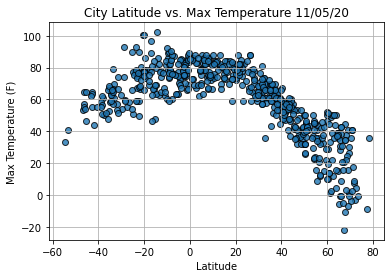

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

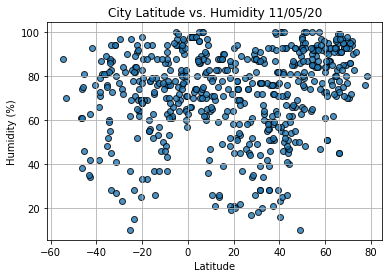

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

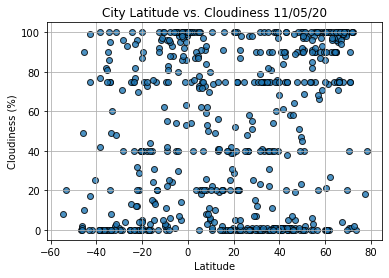

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

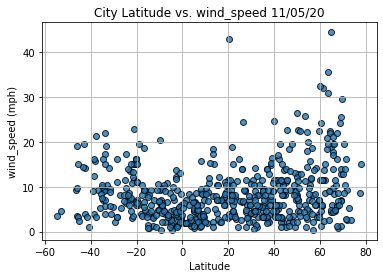

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. wind_speed "+ time.strftime("%x"))
plt.ylabel("wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                       Castro
Country                        BR
Date          2020-11-06 04:19:38
Lat                        -24.79
Lng                        -50.01
Max Temp                    50.88
Humidity                       97
Cloudiness                     13
Wind Speed                   6.46
Name: 13, dtype: object

In [25]:
city_data_df["Lat"]>=0

0       True
1       True
2      False
3      False
4      False
       ...  
573     True
574     True
575     True
576     True
577     True
Name: Lat, Length: 578, dtype: bool

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

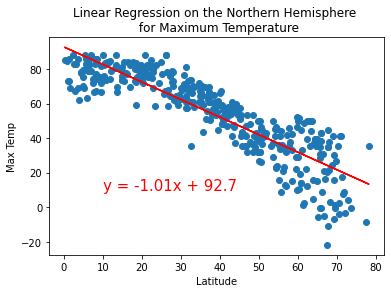

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,10))




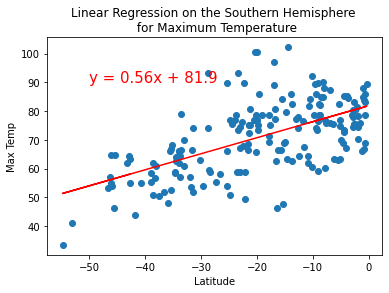

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

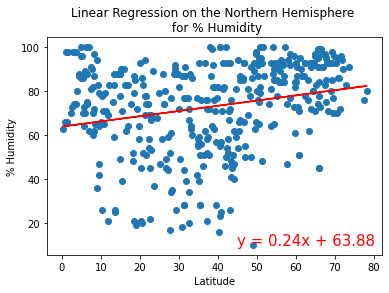

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))

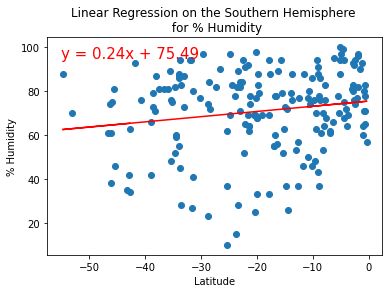

In [30]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,95))

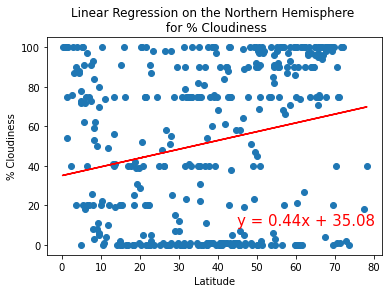

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,10))

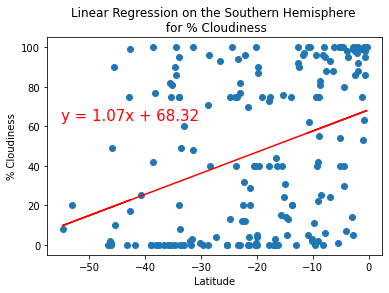

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,63))

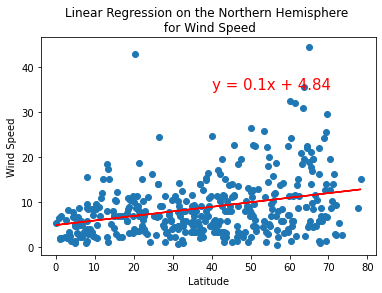

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

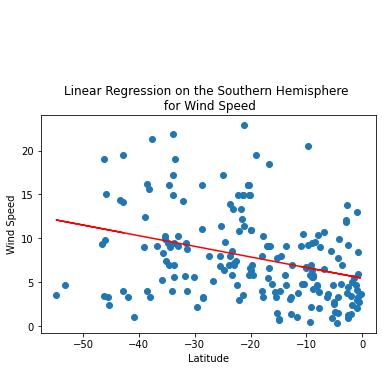

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))